#Задание

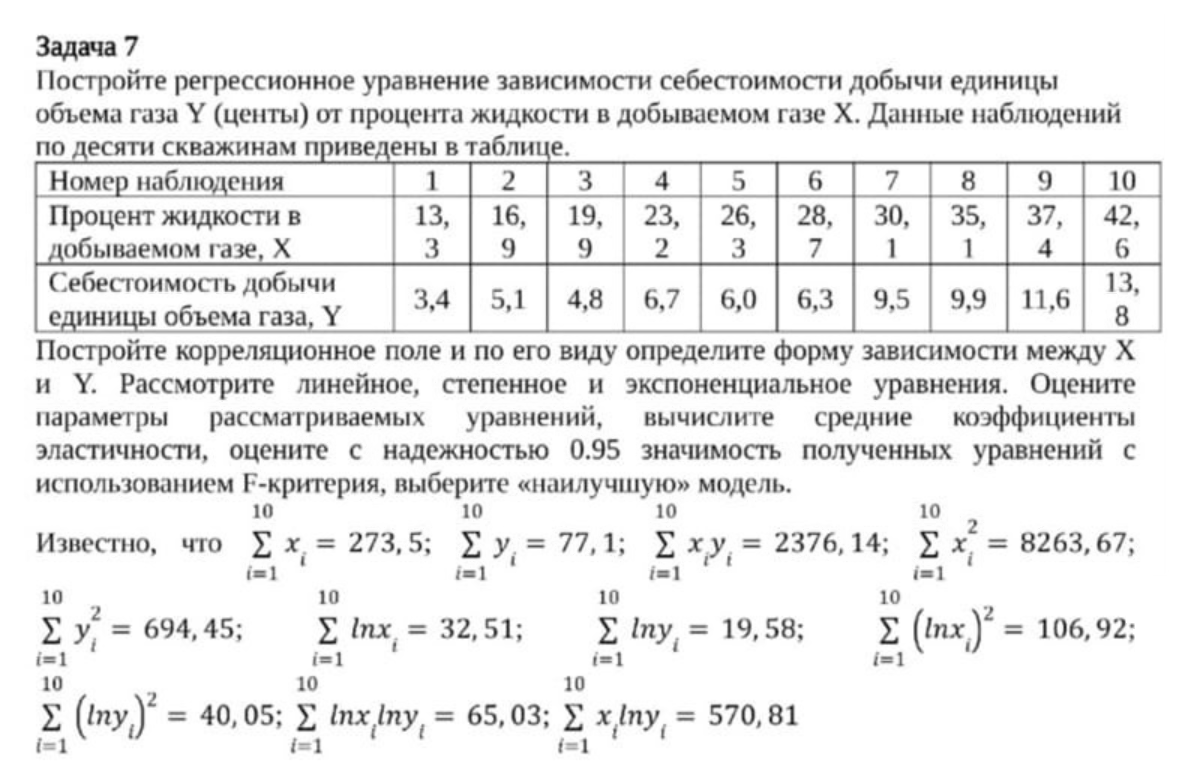

#Корреляционная матрица

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
list_of_lists = [[13.3, 3.4], [16.9, 5.1], [19.9, 4.8], [23.2, 6.7], [26.3, 6.0], [28.7, 6.3], [30.1, 9.5], [35.1, 9.9], [37.4, 11.6], [42.6, 13.8]]
df = pd.DataFrame(list_of_lists, columns = ['X','Y'])
df

,X,Y
0,13.3,3.4
1,16.9,5.1
2,19.9,4.8
3,23.2,6.7
4,26.3,6.0
5,28.7,6.3
6,30.1,9.5
7,35.1,9.9
8,37.4,11.6
9,42.6,13.8


Строим корреляционную матрицу:

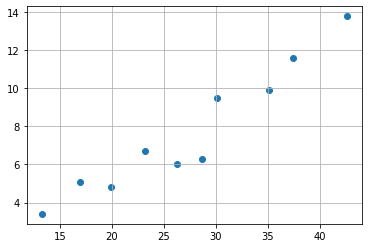

In [ ]:
fig, ax = plt.subplots()

x = df['X'].to_list()
y = df['Y'].to_list()

ax.scatter(x, y)
grid = plt.grid(True)
    
plt.show()

#Линейное уравнение

In [ ]:
df['X*Y'] = df['X'] * df['Y']
df['X^2'] = df['X'] ** 2
df['Y^2'] = df['Y'] ** 2
df

,X,Y,X*Y,X^2,Y^2
0,13.3,3.4,45.22,176.89,11.56
1,16.9,5.1,86.19,285.61,26.01
2,19.9,4.8,95.52,396.01,23.04
3,23.2,6.7,155.44,538.24,44.89
4,26.3,6.0,157.80,691.69,36.00
5,28.7,6.3,180.81,823.69,39.69
6,30.1,9.5,285.95,906.01,90.25
7,35.1,9.9,347.49,1232.01,98.01
8,37.4,11.6,433.84,1398.76,134.56
9,42.6,13.8,587.88,1814.76,190.44


In [ ]:
print('Средний X: ', df['X'].mean())
print('Средний Y: ', df['Y'].mean())
print('Средний X*Y: ', df['X*Y'].mean())
print('Средний X^2: ', df['X^2'].mean())
print('Средний Y^2: ', df['Y^2'].mean())

Средний X:  27.35
Средний Y:  7.709999999999999
Средний X*Y:  237.61399999999998
Средний X^2:  826.3670000000002
Средний Y^2:  69.44500000000001


Вычисляем параметры:

$Dx=\overline{x^2}-\overline{x}^2$

$Dy=\overline{y^2}-\overline{y}^2$

$\sigma_x=\sqrt{Dx}$

$\sigma_y=\sqrt{Dy}$

In [ ]:
mx = df['X'].mean()
my = df['Y'].mean()
dx = df['X^2'].mean() - (mx ** 2)
dy = df['Y^2'].mean() - (my ** 2)
sigma_x = np.sqrt(dx)
sigma_y = np.sqrt(dy)

In [ ]:
print('mx = ', mx)
print('my = ', my)
print('Dx = ', dx)
print('Dy = ', dy)
print('sigma_x = ', sigma_x)
print('sigma_y = ', sigma_y)

mx =  27.35
my =  7.709999999999999
Dx =  78.34450000000015
Dy =  10.000900000000023
sigma_x =  8.851242850583196
sigma_y =  3.1624199594614284


Вычисляем коэффициенты линейного уравнения:

$\beta=\frac{\overline{x*y}-\overline{x}*\overline{y}}{Dx}$

$\alpha=\overline{y}-\beta\overline{x}$

In [ ]:
beta = (df['X*Y'].mean() - (mx * my)) / dx
alpha = my - (beta * mx)
print('y = ', alpha, ' + ', beta, 'x')

y =  -1.6268318771579189  +  0.3413832496218617 x


$y=-1.6268318771579189+0.3413832496218617*x$

Вычисляем средний коэффициент эластичности:

$Э=\frac{dy}{dx}*\frac{\overline{x}}{y(\overline{x})}=\beta\frac{\overline{x}}{y(\overline{x})}=\frac{\beta\overline{x}}{\alpha+\beta\overline{x}}$

In [ ]:
elast = beta * mx / (alpha + (beta * mx))
print('Коэффициент эластичности: ', elast)

Коэффициент эластичности:  1.2110028375042696


Применяем критерий Фишера для оценки значимости выбранной модели:

$r_{xy}=\beta\frac{\sigma_x}{\sigma_y}$

$R^2=r_{xy}^2$

$F=\frac{R^2}{1-R^2}*(n-2)$

In [ ]:
rxy = beta * sigma_x / sigma_y
print('rxy = ', rxy)
R2 = rxy ** 2
print('R^2 = ', R2)
F = R2 / (1 - R2) * (len(df['X']) - 2)
print('Расчётное значение критерия Фишера: ', F)
F_t = 4.96
print('Табличное значение критерия Фишера: ', F_t)
if F < F_t:
  print('Принимается нулевая гипотеза. Выбранная модель не является значимой.')
else:
  print('Нулевая гипотеза отвергается. Выбранная модель является значимой')

rxy =  0.9554917076981017
R^2 =  0.9129644034798345
Расчётное значение критерия Фишера:  83.9164148906185
Табличное значение критерия Фишера:  4.96
Нулевая гипотеза отвергается. Выбранная модель является значимой


Наложим график полученного уравнения на выборку:

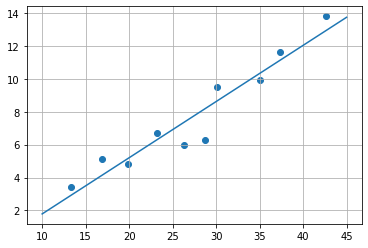

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x, y)
grid = plt.grid(True)

x1 = np.linspace(10, 45, 100)
y1 = lambda x1: alpha + beta*x1
plt.plot(x1, y1(x1))

plt.show()

#Степенное уравнение

In [ ]:
df = df.drop(['X*Y', 'X^2', 'Y^2'], axis=1)

In [ ]:
df['lnX'] = np.log(df['X'])
df['lnY'] = np.log(df['Y'])
df['lnX*lnY'] = df['lnX'] * df['lnY']
df['lnX^2'] = df['lnX'] ** 2
df['lnY^2'] = df['lnY'] ** 2
df

,X,Y,lnX,lnY,lnX*lnY,lnX^2,lnY^2
0,13.3,3.4,2.587764,1.223775,3.166842,6.696523,1.497626
1,16.9,5.1,2.827314,1.629241,4.606374,7.993702,2.654425
2,19.9,4.8,2.990720,1.568616,4.691291,8.944405,2.460556
3,23.2,6.7,3.144152,1.902108,5.980516,9.885694,3.618013
4,26.3,6.0,3.269569,1.791759,5.858281,10.690081,3.210402
5,28.7,6.3,3.356897,1.840550,6.178536,11.268758,3.387623
6,30.1,9.5,3.404525,2.251292,7.664580,11.590792,5.068315
7,35.1,9.9,3.558201,2.292535,8.157300,12.660795,5.255716
8,37.4,11.6,3.621671,2.451005,8.876733,13.116499,6.007426
9,42.6,13.8,3.751854,2.624669,9.847374,14.076410,6.888885


In [ ]:
print('Средний X: ', df['X'].mean())
print('Средний Y: ', df['Y'].mean())
print('Средний lnX: ', df['lnX'].mean())
print('Средний lnY: ', df['lnY'].mean())
print('Средний lnX*lnY: ', df['lnX*lnY'].mean())
print('Средний lnX^2: ', df['lnX^2'].mean())
print('Средний lnY^2: ', df['lnY^2'].mean())

Средний X:  27.35
Средний Y:  7.709999999999999
Средний lnX:  3.2512666989431205
Средний lnY:  1.9575548764311221
Средний lnX*lnY:  6.502782592986156
Средний lnX^2:  10.692365838399292
Средний lnY^2:  4.004898651664968


Вычисляем параметры:

$Dx=\overline{ln^2x}-\overline{lnx}^2$

$Dy=\overline{ln^2y}-\overline{lny}^2$

$\sigma_x=\sqrt{Dx}$

$\sigma_y=\sqrt{Dy}$

In [ ]:
mx = df['lnX'].mean()
my = df['lnY'].mean()
dx = df['lnX^2'].mean() - (mx ** 2)
dy = df['lnY^2'].mean() - (my ** 2)
sigma_x = np.sqrt(dx)
sigma_y = np.sqrt(dy)

In [ ]:
print('mx = ', mx)
print('my = ', my)
print('Dx = ', dx)
print('Dy = ', dy)
print('sigma_x = ', sigma_x)
print('sigma_y = ', sigma_y)

mx =  3.2512666989431205
my =  1.9575548764311221
Dx =  0.12163069074279598
Dy =  0.1728775574257022
sigma_x =  0.34875591857744287
sigma_y =  0.4157854704360197


Вычисляем коэффициенты линейного уравнения:

$\beta=\frac{\overline{lnx*lny}-\overline{lnx}*\overline{lny}}{Dx}$

$ln\alpha=\overline{lny}-\beta\overline{lnx}$

$\alpha=e^{ln\alpha}$

In [ ]:
beta = (df['lnX*lnY'].mean() - (mx * my)) / dx
lnalpha = my - (beta * mx)
alpha = np.e ** lnalpha
print('y = ', alpha, ' * x ^', beta)

y =  0.17588123935020375  * x ^ 1.1366342741921982


$y=0.17588123935020375*x^{1.1366342741921982}$

Вычисляем средний коэффициент эластичности:

$Э=\frac{dy}{dx}*\frac{\overline{x}}{y(\overline{x})}=\alpha\beta {\overline{x}}^{\beta-1}\frac{\overline{x}}{y(\overline{x})}=\frac{\alpha\beta{\overline{x}}^{\beta}}{\alpha{\overline{x}}^{\beta}}=\beta$

In [ ]:
elast = beta
print('Коэффициент эластичности: ', elast)

Коэффициент эластичности:  1.1366342741921982


Расчёт коэффициента детерминации через формулу коэффициента множественной детерминации (так как нелинейная модель):

$R^2=1-\frac{\Sigma(y_i-y(x_i))^2}{\Sigma(y_i-\overline{y})^2}$

In [ ]:
sum1 = 0
sum2 = 0
my0 = df['Y'].mean()

for i in range(len(df['X'])):
  sum1 += (df['Y'][i] - (alpha * (df['X'][i] ** beta))) ** 2
  sum2 += (df['Y'][i] - my0) ** 2

R2 = 1 - (sum1 / sum2)
print('R^2 = ', R2)

R^2 =  0.9122516675373272


Применяем критерий Фишера для оценки значимости выбранной модели:

$F=\frac{R^2}{1-R^2}*(n-2)$

In [ ]:
F = R2 / (1 - R2) * (len(df['X']) - 2)
print('Расчётное значение критерия Фишера: ', F)
F_t = 4.96
print('Табличное значение критерия Фишера: ', F_t)
if F < F_t:
  print('Принимается нулевая гипотеза. Выбранная модель не является значимой.')
else:
  print('Нулевая гипотеза отвергается. Выбранная модель является значимой')

Расчётное значение критерия Фишера:  83.16982369326638
Табличное значение критерия Фишера:  4.96
Нулевая гипотеза отвергается. Выбранная модель является значимой


Наложим график полученного уравнения на выборку:

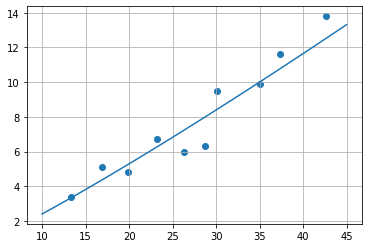

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x, y)
grid = plt.grid(True)

x1 = np.linspace(10, 45, 100)
y1 = lambda x1: alpha * (x1 ** beta)
plt.plot(x1, y1(x1))

plt.show()

#Экспоненциальное уравнение

In [ ]:
df = df.drop(['lnX', 'lnX*lnY', 'lnX^2'], axis=1)

In [ ]:
df['X*lnY'] = df['X'] * df['lnY']
df['X^2'] = df['X'] ** 2
df

,X,Y,lnY,lnY^2,X*lnY,X^2
0,13.3,3.4,1.223775,1.497626,16.276213,176.89
1,16.9,5.1,1.629241,2.654425,27.534165,285.61
2,19.9,4.8,1.568616,2.460556,31.215457,396.01
3,23.2,6.7,1.902108,3.618013,44.128895,538.24
4,26.3,6.0,1.791759,3.210402,47.123274,691.69
5,28.7,6.3,1.840550,3.387623,52.823774,823.69
6,30.1,9.5,2.251292,5.068315,67.763883,906.01
7,35.1,9.9,2.292535,5.255716,80.467970,1232.01
8,37.4,11.6,2.451005,6.007426,91.667591,1398.76
9,42.6,13.8,2.624669,6.888885,111.810882,1814.76


In [ ]:
print('Средний X: ', df['X'].mean())
print('Средний Y: ', df['Y'].mean())
print('Средний lnY: ', df['lnY'].mean())
print('Средний lnY^2: ', df['lnY^2'].mean())
print('Средний X*lnY: ', df['X*lnY'].mean())
print('Средний X^2: ', df['X^2'].mean())

Средний X:  27.35
Средний Y:  7.709999999999999
Средний lnY:  1.9575548764311221
Средний lnY^2:  4.004898651664968
Средний X*lnY:  57.08121040693557
Средний X^2:  826.3670000000002


Вычисляем параметры:

$Dx=\overline{x^2}-\overline{x}^2$

$Dy=\overline{ln^2y}-\overline{lny}^2$

$\sigma_x=\sqrt{Dx}$

$\sigma_y=\sqrt{Dy}$

In [ ]:
mx = df['X'].mean()
my = df['lnY'].mean()
dx = df['X^2'].mean() - (mx ** 2)
dy = df['lnY^2'].mean() - (my ** 2)
sigma_x = np.sqrt(dx)
sigma_y = np.sqrt(dy)

In [ ]:
print('mx = ', mx)
print('my = ', my)
print('Dx = ', dx)
print('Dy = ', dy)
print('sigma_x = ', sigma_x)
print('sigma_y = ', sigma_y)

mx =  27.35
my =  1.9575548764311221
Dx =  78.34450000000015
Dy =  0.1728775574257022
sigma_x =  8.851242850583196
sigma_y =  0.4157854704360197


Вычисляем коэффициенты линейного уравнения:

$\beta=\frac{\overline{x*lny}-\overline{x}*\overline{lny}}{Dx}$

$ln\alpha=\overline{lny}-\beta\overline{x}$

$\alpha=e^{ln\alpha}$

In [ ]:
beta = (df['X*lnY'].mean() - (mx * my)) / dx
lnalpha = my - (beta * mx)
alpha = np.e ** lnalpha
print('y = ', alpha, ' * e ^ (', beta, '* x)')

y =  2.05652178365776  * e ^ ( 0.04521165540075392 * x)


$y=2.05652178365776*e^{0.04521165540075392*x}$

Вычисляем средний коэффициент эластичности:

$Э=\frac{dy}{dx}*\frac{\overline{x}}{y(\overline{x})}=\alpha\beta e^{\beta\overline{x}}*\frac{\overline{x}}{\alpha e^{\beta\overline{x}}}=\beta\overline{x}$

In [ ]:
elast = beta * mx
print('Коэффициент эластичности: ', elast)

Коэффициент эластичности:  1.2365387752106198


Расчёт коэффициента детерминации через формулу коэффициента множественной детерминации (так как нелинейная модель):

$R^2=1-\frac{\Sigma(y_i-y(x_i))^2}{\Sigma(y_i-\overline{y})^2}$

In [ ]:
sum1 = 0
sum2 = 0
my0 = df['Y'].mean()

for i in range(len(df['X'])):
  sum1 += (df['Y'][i] - (alpha * (np.e ** (beta * df['X'][i])))) ** 2
  sum2 += (df['Y'][i] - my0) ** 2

R2 = 1 - (sum1 / sum2)
print('R^2 = ', R2)

R^2 =  0.9406817433510783


Применяем критерий Фишера для оценки значимости выбранной модели:

$F=\frac{R^2}{1-R^2}*(n-2)$

In [ ]:
F = R2 / (1 - R2) * (len(df['X']) - 2)
print('Расчётное значение критерия Фишера: ', F)
F_t = 4.96
print('Табличное значение критерия Фишера: ', F_t)
if F < F_t:
  print('Принимается нулевая гипотеза. Выбранная модель не является значимой.')
else:
  print('Нулевая гипотеза отвергается. Выбранная модель является значимой')

Расчётное значение критерия Фишера:  126.8657302480826
Табличное значение критерия Фишера:  4.96
Нулевая гипотеза отвергается. Выбранная модель является значимой


Наложим график полученного уравнения на выборку:

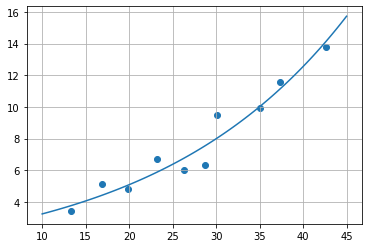

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x, y)
grid = plt.grid(True)

x1 = np.linspace(10, 45, 100)
y1 = lambda x1: alpha * (np.e ** (beta * x1))
plt.plot(x1, y1(x1))

plt.show()

#Вывод

В принципе, все построенные модели являются значимыми по критерию Фишера, причём они прошли табличный коэффициент с большим запасом. Поэтому любая из них является потенциально хорошей. Но нам нужно выбрать лучшую, поэтому выберем модель с наибольшим коэффициентом Фишера:

$F_{линейная}=83.9164148906185$

$F_{степенная}=83.16982369326638$

$F_{экспоненциальная}=126.8657302480826$

Делаем вывод: экспоненциальная модель является наиболее значимой из трёх построенных.